In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:/postgre/sydney_rain prediction.csv", header = 0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


It seems there are several NA values in this dataset. We're gonna have to fill them before moving foreward.

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


<Axes: ylabel='Rainfall'>

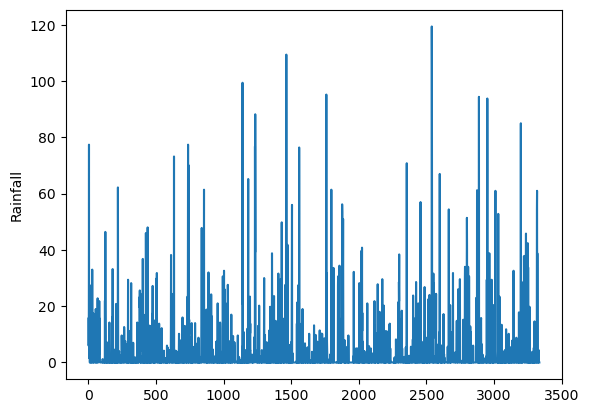

In [5]:
sns.lineplot(df.Rainfall)

The data is very irregular but that much is to be expected from rainfall data. To treat such data as outliers could have a very negative impact on the model's functioning. Extreme data is to be expected in rainfall.

## Null Value Imputation

In [6]:
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())

In [7]:
df.RainToday = df.RainToday.fillna(df.RainToday.mode())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


Now that we've treated the missing values we can move on to building the model. However, before we do so let us study the data a bit more using visualizations.

## Visualizations

<Axes: xlabel='Location', ylabel='count'>

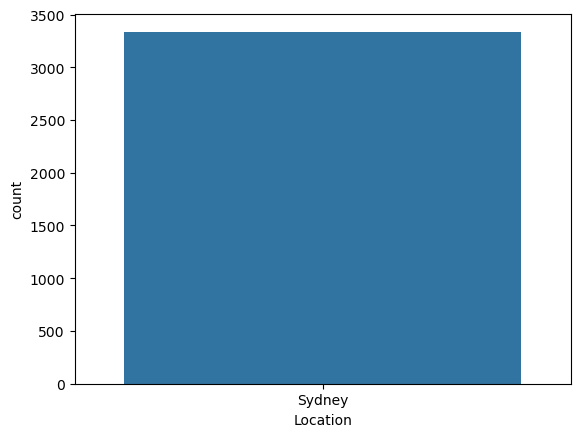

In [9]:
sns.countplot(x = "Location", data = df)

Now this is an issue. Since the value of location is just Sydney for every entry, it adds nothing to the analysis. It would be beneficial for the proper functioning of this model to just remove this entry altogether. 

In [10]:
del df['Location']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   MinTemp       3337 non-null   float64
 2   MaxTemp       3337 non-null   float64
 3   Rainfall      3337 non-null   float64
 4   Evaporation   3337 non-null   float64
 5   Sunshine      3337 non-null   float64
 6   Humidity9am   3337 non-null   float64
 7   Humidity3pm   3337 non-null   float64
 8   Pressure9am   3337 non-null   float64
 9   Pressure3pm   3337 non-null   float64
 10  Cloud9am      3337 non-null   float64
 11  Cloud3pm      3337 non-null   float64
 12  Temp9am       3337 non-null   float64
 13  Temp3pm       3337 non-null   float64
 14  RainToday     3331 non-null   object 
 15  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(3)
memory usage: 417.3+ KB


<Axes: xlabel='RainToday', ylabel='count'>

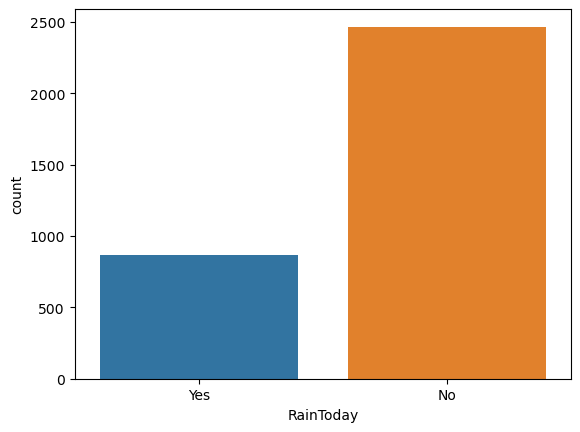

In [12]:
sns.countplot(x = "RainToday", data = df)

## Dummy Variable Creation

In [13]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [14]:
df = pd.get_dummies(df, columns = ['RainToday','RainTomorrow'], drop_first = True)

In [15]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,01-02-2008,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,02-02-2008,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,03-02-2008,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,04-02-2008,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,05-02-2008,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [16]:
df['Day'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True).dt.day
df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True).dt.month
df['Year'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', dayfirst=True).dt.year

In [17]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Day,Month,Year
0,01-02-2008,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,1,2,2008
1,02-02-2008,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2,2,2008
2,03-02-2008,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,3,2,2008
3,04-02-2008,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,4,2,2008
4,05-02-2008,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,5,2,2008


This was done in order to extract the month, date, and year from the dataset to make it fit in the classification model. We can now go ahead and drop the Date column altogether.

In [18]:
del df["Date"]

## Model 1 - Classification Model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df.loc[:,df.columns!="RainTomorrow_Yes"]
type(x)

pandas.core.frame.DataFrame

In [21]:
y = df["RainTomorrow_Yes"]
type(y)

pandas.core.series.Series

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

In [23]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,Day,Month,Year
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2,2008
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,2,2,2008
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,3,2,2008
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,4,2,2008
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,5,2,2008


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Decision Tree**

In [25]:
from sklearn import tree

In [26]:
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [27]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [29]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
confusion_matrix(y_train, y_train_pred)

array([[1777,  185],
       [ 279,  428]], dtype=int64)

In [32]:
confusion_matrix(y_test, y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [33]:
accuracy_score(y_test, y_test_pred)

0.811377245508982

As we can see our model has turned out to be very successful. An 81% accuracy rate is quite good. Let us try and improve this model further by applying emsemble techniques. Let us plot the decision tree before that.

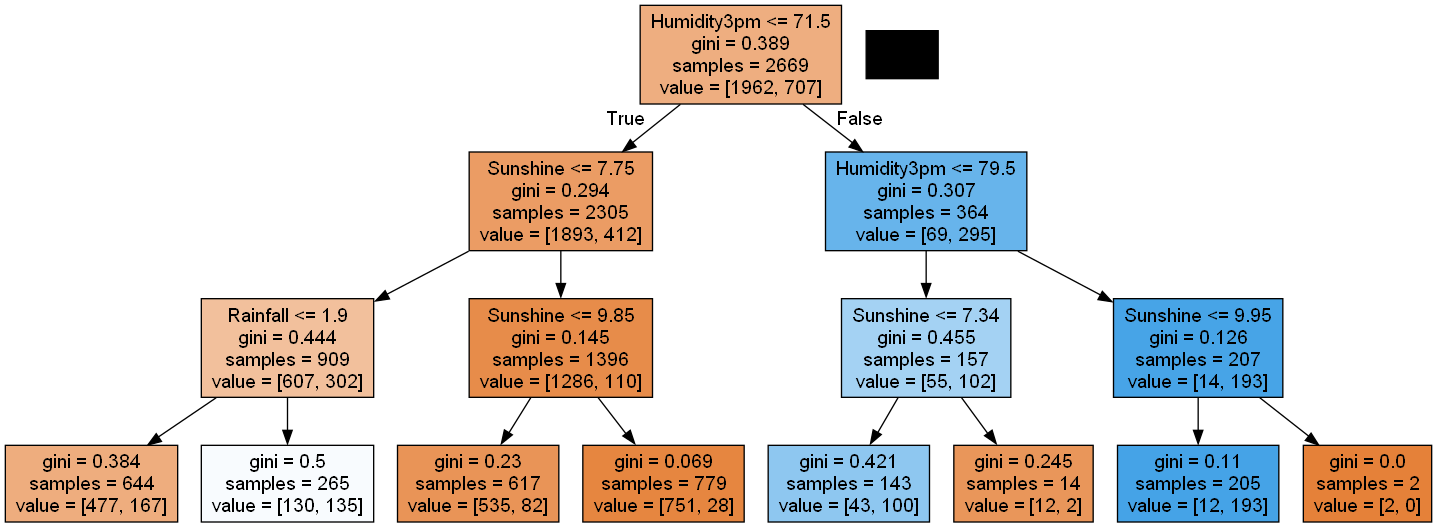

In [34]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names = x_train.columns, filled = True)
from IPython.display import Image
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Bagging

In [35]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators= 1000, bootstrap = True, n_jobs = 1, random_state = 42)

In [38]:
bag_clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=1, random_state=42)

In [39]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[470,  40],
       [ 76,  82]], dtype=int64)

In [40]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.8263473053892215

We were able to achieve an improvement of 1% applying the bagging method on our decision tree. Let us now apply random forest and see how well that works.

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [43]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [44]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[479,  31],
       [ 79,  79]], dtype=int64)

In [45]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.8353293413173652

Random Forest was able to improve the performance of the model by 2%. It has performed better than bagging in that regard. However, before moving on to boosting techniques let us apply grid search on this random forest and see if it can be improved any further. 

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state = 42)

In [48]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [49]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, cv=5, scoring='accuracy')

In [50]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [51]:
grid_search.best_params_

{'max_features': 7, 'min_samples_split': 10}

In [52]:
cvrf_clf = grid_search.best_estimator_

In [53]:
accuracy_score(y_test, cvrf_clf.predict(x_test))

0.8338323353293413

In [54]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[477,  33],
       [ 78,  80]], dtype=int64)

Grid search was unable to improve the performance of the model by a whole lot it seems. Let us move on to boosting techniques. 

## Boosting 

Let us use xgboost on our model to improve performance.

In [55]:
import xgboost as xgb

In [56]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [57]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.8368263473053892

Very minor improvement from what we were able to achieve through random forest. But still if we focus purely on numbers then xgboost has performed the best. Even if by a hair's length. 

## Q&A

1. Your views about the problem statement?
2. What will be your approach to solving this task?
3. What were the available ML model options you had to perform this task?
4. Which model’s performance is best and what could be the possible reason for that?
5. What steps can you take to improve this selected model’s performance even further?

A1. An interesting problem cause it makes us work with weather data. Another thing is that the data required quite a bit of pre-processing, which was good practice for me. 

A2. The first thing to do with any dataset is pre-processing. After that I applied a simple classification tree. Once a base was established I moved on to baggind and random forest, which was followed by xgboost. 

A3. Since this was a classification problem I went with a classification tree. This in my opinion is the best way to go about such problems. 

A4. xgboost was able to provide the best accuracy score among all others. It controls overfitting quite well as we all know. 

A5. I believe I have done all that can be done. Still if someone wishes to try they may go ahead and apply the other boosting techniques to this model.